In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
file_path = 'gold_based_merged_filled_20250703_113946_final.csv'
df = pd.read_csv(file_path, parse_dates=['tanggal'], index_col='tanggal')

In [8]:
df.rename(columns={
    'close_rate': 'close_rate_fed',
    'open_rate': 'open_rate_fed',
    'high_rate': 'high_rate_fed',
    'low_rate': 'low_rate_fed',
    'close_index': 'close_index_jsec',
    'open_index': 'open_index_jsec',
    'high_index': 'high_index_jsec',
    'low_index': 'low_index_jsec',
}, inplace=True)

In [9]:
df

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate_fed,open_rate_fed,high_rate_fed,low_rate_fed,volume_billion_x,change_percent_x,close_index_jsec,open_index_jsec,high_index_jsec,low_index_jsec,volume_billion_y,change_percent_y
tanggal,,,,,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,0.000000e+00,-0.250000
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,3.300000e+09,-0.250000
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.460000e+09,0.630000
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.353333e+09,0.073333
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.246667e+09,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,0,0.0,6636.00,6631.31,6682.94,6577.83,1.685333e+10,-0.290000
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,0,0.0,6598.21,6618.92,6629.44,6568.13,1.536000e+10,-0.570000
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,0,0.0,6545.85,6535.87,6567.58,6499.04,1.500000e+10,-0.790000


In [10]:
kolom_dihapus = ['volume_billion_x', 'change_percent_x', 'volume_billion_y', 'change_percent_y']
df.drop(kolom_dihapus, axis=1, inplace=True)


In [11]:
df

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate_fed,open_rate_fed,high_rate_fed,low_rate_fed,close_index_jsec,open_index_jsec,high_index_jsec,low_index_jsec
tanggal,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,6636.00,6631.31,6682.94,6577.83
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,6598.21,6618.92,6629.44,6568.13
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,6545.85,6535.87,6567.58,6499.04


In [22]:
df.to_csv('gold_based_merged_filled_20250703_113946_final.csv', index=True)

In [21]:
df.rename(columns={
    'WTI_Price_USD': 'world_oil_price_USD',
}, inplace=True)

In [16]:
df

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate_fed,open_rate_fed,high_rate_fed,low_rate_fed,close_index_jsec,open_index_jsec,high_index_jsec,low_index_jsec
tanggal,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,6283.58,6313.13,6317.01,6263.68
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,6323.47,6306.19,6323.47,6287.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,6636.00,6631.31,6682.94,6577.83
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,6598.21,6618.92,6629.44,6568.13
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,6545.85,6535.87,6567.58,6499.04


In [23]:
df.shape

(1899, 16)

In [20]:
file_path_old = 'gold_based_merged_filled_20250703_113946.csv'
df_old = pd.read_csv(file_path_old, parse_dates=['tanggal'], index_col='tanggal')
df_old

,usd_per_ounce,kurs_dollar_per_ounce,idr_per_ounce,usd_per_gram,kurs_dollar_per_gram,idr_per_gram,WTI_Price_USD,inflation_rate,close_rate,open_rate,high_rate,low_rate,volume_billion_x,change_percent_x,close_index,open_index,high_index,low_index,volume_billion_y,change_percent_y
tanggal,,,,,,,,,,,,,,,,,,,,
2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,61.17,2.680000,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,0.000000e+00,-0.250000
2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,61.17,2.689677,1.55,1.55,1.55,1.55,0,0.0,6283.58,6313.13,6317.01,6263.68,3.300000e+09,-0.250000
2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,63.00,2.699355,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.460000e+09,0.630000
2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.709032,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.353333e+09,0.073333
2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,63.00,2.718710,1.55,1.55,1.55,1.55,0,0.0,6323.47,6306.19,6323.47,6287.71,4.246667e+09,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09,2911.17,16315.00,47495739,93.60,16315.00,1527023,67.29,1.030000,4.33,4.33,4.33,4.33,0,0.0,6636.00,6631.31,6682.94,6577.83,1.685333e+10,-0.290000
2025-03-10,2898.61,16336.00,47351693,93.19,16336.00,1522392,66.31,1.030000,4.33,4.33,4.33,4.33,0,0.0,6598.21,6618.92,6629.44,6568.13,1.536000e+10,-0.570000
2025-03-11,2916.73,16326.00,47618534,93.78,16326.00,1530971,66.52,1.030000,4.33,4.33,4.33,4.33,0,0.0,6545.85,6535.87,6567.58,6499.04,1.500000e+10,-0.790000


Liniear regresion Test

In [5]:
selected_columns = ['kurs_dollar_per_gram', 'inflation_rate', 'world_oil_price_USD', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec']
X = df[selected_columns]
y = df['idr_per_gram']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data dibagi menjadi {len(X_train)} data training dan {len(X_test)} data testing.")

Data dibagi menjadi 1519 data training dan 380 data testing.


In [ ]:
print("Melatih model Linear Regression...")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model selesai dilatih!")

Melatih model Linear Regression...
✅ Model selesai dilatih!


In [8]:
print("\n--- 📊 Hasil Evaluasi ---")
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)



--- 📊 Hasil Evaluasi ---


In [9]:
print(f"Mean Absolute Error (MAE): Rp{mae:.2f}")

Mean Absolute Error (MAE): Rp60268.21


In [10]:
print(f"Skor R-squared (R²): {r2_linear:.2%}")

Skor R-squared (R²): 85.13%


In [31]:
print(y_pred)

[ 987835.69561435  910647.82284768  894473.72698002  864934.85835067
 1024945.83223857  892561.5973488   670008.46704851  878754.9243219
 1033580.26081786  897115.47724911 1171681.80408125 1129742.46172731
  802384.25861689  791935.97727086  816652.34443137 1379537.62272993
  890223.56392221 1023341.22780404  926872.63934536 1067421.32995949
 1016519.14462525  805792.99744916 1269309.98445799  857701.41714749
 1443541.74962826  939739.95542216  757680.434833   1308313.45108724
  973774.77853923  906806.9217006   975988.18612883 1270315.13046659
 1262640.35831121  961111.54895987 1419081.36858046  995541.34813878
  873761.13943047  763574.61170996  858179.81375593  815981.21096436
  813258.73938736  766304.69991831  881374.97383929  975042.06856224
 1176459.98693468  921056.65824324  842116.89896998  962310.87053183
 1004117.9754592  1101860.7470723   978834.54132021  846390.66353895
  787904.05583305  911369.72356508  885263.28621773  859530.17441285
  868564.83248053  836717.16547502 

In [33]:
# Buat DataFrame baru untuk perbandingan
hasil_prediksi = pd.DataFrame({
    'Harga Asli': y_test,
    'Harga Prediksi': y_pred
})

# Tambah kolom 'Selisih' untuk liat perbedaannya
hasil_prediksi['Selisih'] = hasil_prediksi['Harga Asli'] - hasil_prediksi['Harga Prediksi']

# Tampilkan 10 baris pertama dari tabel perbandingan
print("\n--- 🧐 Perbandingan Hasil Prediksi vs Harga Asli ---")
print(hasil_prediksi.head(10))


--- 🧐 Perbandingan Hasil Prediksi vs Harga Asli ---
            Harga Asli  Harga Prediksi        Selisih
tanggal                                              
2023-05-07      922442    9.878357e+05  -65393.695614
2020-04-21      842858    9.106478e+05  -67789.822848
2021-07-08      838160    8.944737e+05  -56313.726980
2021-06-10      868234    8.649349e+05    3299.141649
2023-08-03      922442    1.024946e+06 -102503.832239
2023-01-05      922442    8.925616e+05   29880.402651
2020-03-11      757050    6.700085e+05   87041.532951
2020-09-08      921562    8.787549e+05   42807.075678
2023-08-07      922442    1.033580e+06 -111138.260818
2022-10-26      836643    8.971155e+05  -60472.477249


In [27]:
skenario_netral = {
    'kurs_dollar_per_gram': 71.0,  
    'inflation_rate': 2.9,
    'WTI_Price_USD': 67.0,
    'open_rate': 4.25,
    'close_rate': 4.25
}


In [28]:
selected_columns = ['kurs_dollar_per_gram', 'inflation_rate', 'WTI_Price_USD', 'open_rate', 'close_rate']
data_prediksi = pd.DataFrame([skenario_netral], columns=selected_columns)
print(data_prediksi)

   kurs_dollar_per_gram  inflation_rate  WTI_Price_USD  open_rate  close_rate
0                  71.0             2.9           67.0       4.25        4.25


In [29]:
prediksi_netral = model.predict(data_prediksi)

In [30]:
print(f"Prediksi harga emas di Des 2025 adalah: Rp {prediksi_netral[0]:,.0f} per gram")

Prediksi harga emas di Des 2025 adalah: Rp -1,405,361 per gram


Random Forest

In [34]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_model.fit(X_train, y_train)
print("Model selesai dilatih! 🌲🌳🌲")

Model selesai dilatih! 🌲🌳🌲


In [36]:
print("\n--- Hasil Evaluasi Random Forest ---")
y_pred_forest = forest_model.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Mean Absolute Error (MAE): Rp{mae_forest:.2f}")
print(f"Skor R-squared (R²): {r2_forest:.2%}")


--- Hasil Evaluasi Random Forest ---
Mean Absolute Error (MAE): Rp7321.34
Skor R-squared (R²): 99.21%


In [37]:
print("\n================ Perbandingan ================")
print(f"R² Linear Regression: {r2_linear:.2%}")
print(f"R² Random Forest    : {r2_forest:.2%}")
print("============================================")


================ Perbandingan ================
R² Linear Regression: 85.13%
R² Random Forest    : 99.21%


In [41]:
skenario_netral = {
    'kurs_dollar_per_gram': 71.0,
    'inflation_rate': 2.9,
    'world_oil_price_USD': 67.0,
    'open_rate_fed': 4.25,
    'close_rate_fed': 4.25, 
    'open_index_jsec': 6289.0, 
    'close_rate_fed': 6134.0, 
}
data_prediksi = pd.DataFrame([skenario_netral], columns=selected_columns)


In [42]:
prediksi_rf = forest_model.predict(data_prediksi)

In [43]:
print(f"\n--- 🚀 Hasil Prediksi dengan Random Forest ---")
print(f"Prediksi harga emas di Des 2025 adalah: Rp {prediksi_rf[0]:,.0f} per gram")


--- 🚀 Hasil Prediksi dengan Random Forest ---
Prediksi harga emas di Des 2025 adalah: Rp 909,208 per gram


Make another model use LSTM

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_path = 'gold_based_merged_filled_20250703_113946_final.csv'
df = pd.read_csv(file_path, parse_dates=['tanggal'], index_col='tanggal')

In [4]:
price_data = df['idr_per_gram'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_data)

print("--- Data berhasil di-scaling ---")

--- Data berhasil di-scaling ---


In [6]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

In [7]:
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"--- Sequences dibuat dengan shape X: {X.shape} dan y: {y.shape} ---")

--- Sequences dibuat dengan shape X: (1839, 60, 1) dan y: (1839,) ---


In [8]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"--- Data di-split: {len(X_train)} train, {len(X_test)} test ---")

--- Data di-split: 1471 train, 368 test ---


In [9]:
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().reshape(-1, 1)

In [10]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

print("--- Blueprint model LSTM siap ---")


--- Blueprint model LSTM siap ---


In [11]:
model = LSTMModel()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50 # Lo bisa naikin epochs kalo mau training lebih lama
print("--- Mulai training... Sabar ya, ini butuh waktu hehe ---")

for i in range(epochs):
    model.train() # Set model ke mode training
    optimizer.zero_grad()
    
    y_pred = model(X_train_tensor)
    
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0:
        print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.6f}")

print("--- Training selesai! ---")


--- Mulai training... Sabar ya, ini butuh waktu hehe ---
Epoch [10/50], Loss: 0.005937
Epoch [20/50], Loss: 0.005776
Epoch [30/50], Loss: 0.005425
Epoch [40/50], Loss: 0.004891
Epoch [50/50], Loss: 0.004893
--- Training selesai! ---


In [12]:
model.eval() # Set model ke mode evaluasi (penting!)

with torch.no_grad(): # Ga perlu hitung gradien pas prediksi
    test_predictions_scaled = model(X_test_tensor)


In [13]:
# Balikin hasil prediksi dari skala 0-1 ke harga Rupiah asli
test_predictions = scaler.inverse_transform(test_predictions_scaled.numpy())
# Balikin juga y_test asli buat perbandingan
y_test_real = scaler.inverse_transform(y_test_tensor.numpy())

print("--- Prediksi di data test selesai ---")

--- Prediksi di data test selesai ---


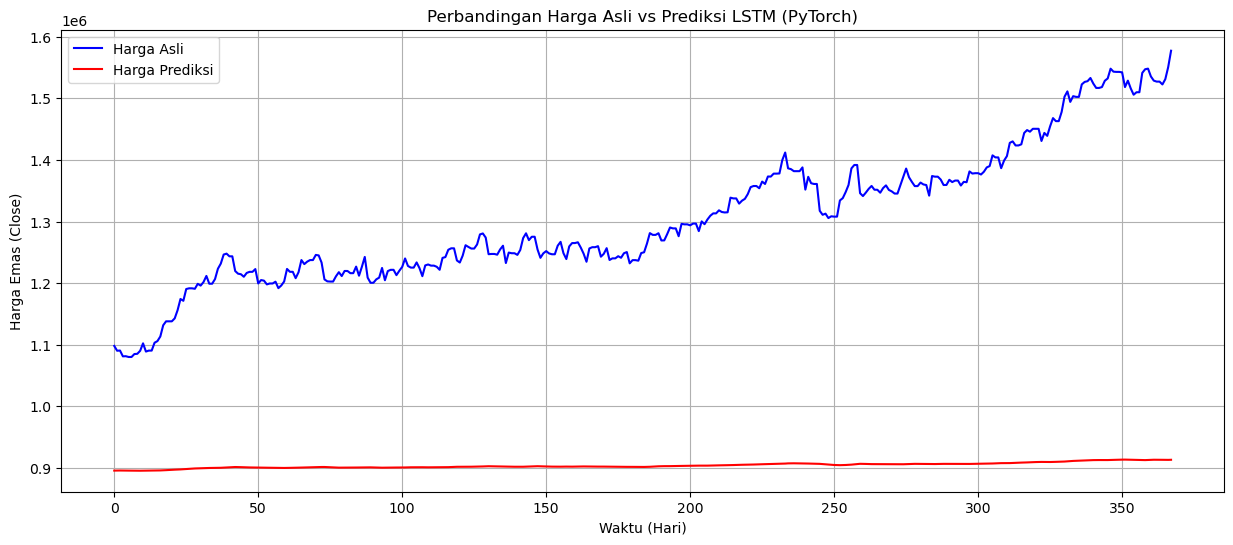

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_real, color='blue', label='Harga Asli')
plt.plot(test_predictions, color='red', label='Harga Prediksi')
plt.title('Perbandingan Harga Asli vs Prediksi LSTM (PyTorch)')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga Emas (Close)')
plt.legend()
plt.grid(True)
plt.show()

Multivariat LSTM

In [16]:
features = ['idr_per_gram', 'kurs_dollar_per_ounce', 'world_oil_price_USD', 'inflation_rate', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec', 'close_index_jsec'] 
n_features = len(features)

In [17]:
data = df[features].values


In [19]:
# --- 2. SCALING DATA (0 sampai 1) ---
# === PERUBAHAN DI SINI ===
# Scaler sekarang belajar dari SEMUA fitur, bukan cuma 'Close'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print(f"--- Data berhasil di-scaling untuk {n_features} fitur ---")

--- Data berhasil di-scaling untuk 8 fitur ---


In [20]:

# --- 3. MEMBUAT SEQUENCES ---
# === PERUBAHAN DI SINI ===
def create_sequences_multi(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        # X sekarang berisi semua fitur selama time_step
        X.append(data[i:(i + time_step), :]) 
        # y tetep cuma harga 'Close' (kolom ke-0)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences_multi(scaled_data, time_step)

# X udah 3D, jadi ga perlu di-reshape lagi
print(f"--- Sequences dibuat dengan shape X: {X.shape} dan y: {y.shape} ---")

--- Sequences dibuat dengan shape X: (1839, 60, 8) dan y: (1839,) ---


In [21]:
# --- 4. SPLIT DATA: TRAIN & TEST ---
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"--- Data di-split: {len(X_train)} train, {len(X_test)} test ---")

--- Data di-split: 1471 train, 368 test ---


In [22]:
# --- 5. CONVERT KE PYTORCH TENSOR ---
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().reshape(-1, 1)

In [23]:
# --- 6. DEFINISIKAN MODEL LSTM ---
# === PERUBAHAN DI SINI ===
# Kita perlu kasih tau modelnya ukuran inputnya sekarang bukan 1, tapi n_features
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Inisialisasi hidden state (ga perlu diubah)
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_size=n_features) # <-- Ukuran input disesuain di sini
print(f"--- Blueprint model LSTM siap untuk {n_features} fitur ---")

--- Blueprint model LSTM siap untuk 8 fitur ---


In [24]:
# --- 7. INISIALISASI & TRAINING LOOP ---
# Bagian ini sama persis kayak sebelumnya
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50 
print("--- Mulai training model multivariate... ---")

for i in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    y_pred = model(X_train_tensor)
    
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0:
        print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.6f}")

print("--- Training selesai! ---")

--- Mulai training model multivariate... ---
Epoch [10/50], Loss: 0.006857
Epoch [20/50], Loss: 0.003591
Epoch [30/50], Loss: 0.002613
Epoch [40/50], Loss: 0.002422
Epoch [50/50], Loss: 0.002192
--- Training selesai! ---


In [27]:
# --- 8. EVALUASI & PREDIKSI ---
model.eval()
with torch.no_grad():
    test_predictions_scaled = model(X_test_tensor)

# === PERUBAHAN BESAR DI SINI (TRIK INVERSE TRANSFORM) ===
# Scaler kita dilatih pake `n_features` kolom, jadi input buat inverse_transform
# juga harus punya `n_features` kolom.
# Kita bikin "dummy" array sebesar `n_features` kolom,
# terus isi kolom pertama dengan hasil prediksi kita.

# Buat dummy array untuk prediksi
dummy_predictions = np.zeros((len(test_predictions_scaled), n_features))
dummy_predictions[:, 0] = test_predictions_scaled.flatten().numpy()
# Inverse transform si dummy array
test_predictions = scaler.inverse_transform(dummy_predictions)[:, 0]

# Lakuin hal yang sama buat y_test
dummy_y_test = np.zeros((len(y_test_tensor), n_features))
dummy_y_test[:, 0] = y_test_tensor.flatten().numpy()
y_test_real = scaler.inverse_transform(dummy_y_test)[:, 0]

print("--- Prediksi di data test selesai & dikembalikan ke Rupiah ---")


--- Prediksi di data test selesai & dikembalikan ke Rupiah ---


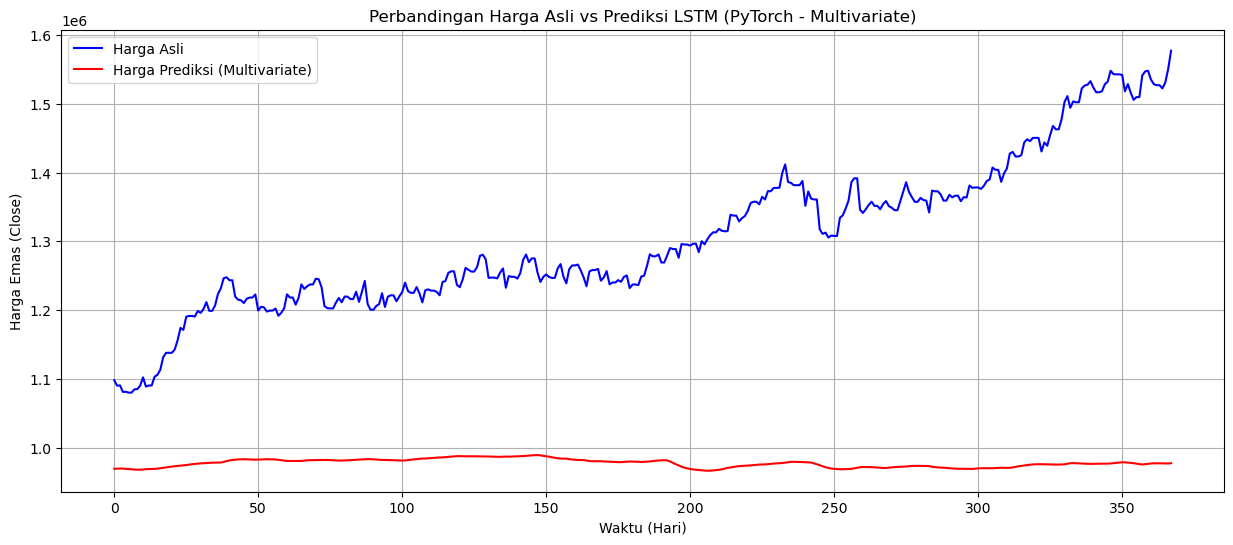

In [28]:
# --- 9. VISUALISASI HASIL ---
# Sama persis, ga ada yang diubah
plt.figure(figsize=(15, 6))
plt.plot(y_test_real, color='blue', label='Harga Asli')
plt.plot(test_predictions, color='red', label='Harga Prediksi (Multivariate)')
plt.title('Perbandingan Harga Asli vs Prediksi LSTM (PyTorch - Multivariate)')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga Emas (Close)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# --- 4. SPLIT DATA: TRAIN, VALIDATION, & TEST ---
# === PERUBAHAN DI SINI ===

# Pertama, pisahin dulu data test (20% terakhir)
train_val_size = int(len(X) * 0.8)
X_train_val, X_test = X[:train_val_size], X[train_val_size:]
y_train_val, y_test = y[:train_val_size], y[train_val_size:]

# Kedua, dari data train_val, pisahin lagi jadi train baru & validation
# Misal, 20% dari data train_val dijadiin validation set
# shuffle=False itu WAJIB buat data time series!
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False
)

print(f"--- Data di-split: {len(X_train)} train, {len(X_val)} validation, {len(X_test)} test ---")

--- Data di-split: 1176 train, 295 validation, 368 test ---


In [30]:
# --- 5. CONVERT KE PYTORCH TENSOR ---
# === PERUBAHAN DI SINI ===
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float().reshape(-1, 1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().reshape(-1, 1)



In [31]:
# --- 6. DEFINISIKAN MODEL LSTM ---
# Sama persis, ga ada yang diubah
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_size=n_features)


In [35]:
# --- 7. TRAINING LOOP DENGAN VALIDASI ---
# === PERUBAHAN DI SINI ===
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 20 # Kita bisa set lebih banyak karena nanti bisa pake early stopping
# Siapin list kosong buat nyimpen loss
train_losses = []
val_losses = []

print("--- Mulai training dengan validasi... ---")

for i in range(epochs):
    # --- Training Phase ---
    model.train()
    optimizer.zero_grad()
    y_pred_train = model(X_train_tensor)
    loss_train = loss_function(y_pred_train, y_train_tensor)
    loss_train.backward()
    optimizer.step()
    
    # --- Validation Phase ---
    model.eval() # Set model ke mode evaluasi
    with torch.no_grad(): # Ga perlu itung gradien
        y_pred_val = model(X_val_tensor)
        loss_val = loss_function(y_pred_val, y_val_tensor)
    
    # Simpen loss tiap epoch
    train_losses.append(loss_train.item())
    val_losses.append(loss_val.item())
    
    if (i + 1) % 10 == 0:
        print(f"Epoch [{i+1}/{epochs}], Train Loss: {loss_train.item():.6f}, Val Loss: {loss_val.item():.6f}")

print("--- Training selesai! ---")


--- Mulai training dengan validasi... ---
Epoch [10/20], Train Loss: 0.001876, Val Loss: 0.006318
Epoch [20/20], Train Loss: 0.001581, Val Loss: 0.004991
--- Training selesai! ---


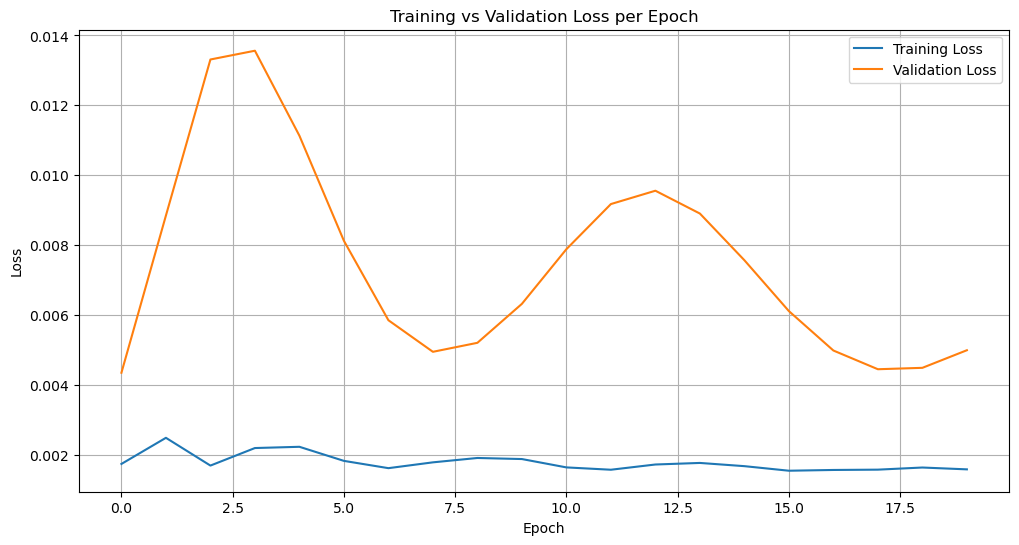

In [36]:
# --- 8. PLOT HASIL TRAINING & VALIDATION LOSS ---
# === BAGIAN BARU DI SINI ===
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


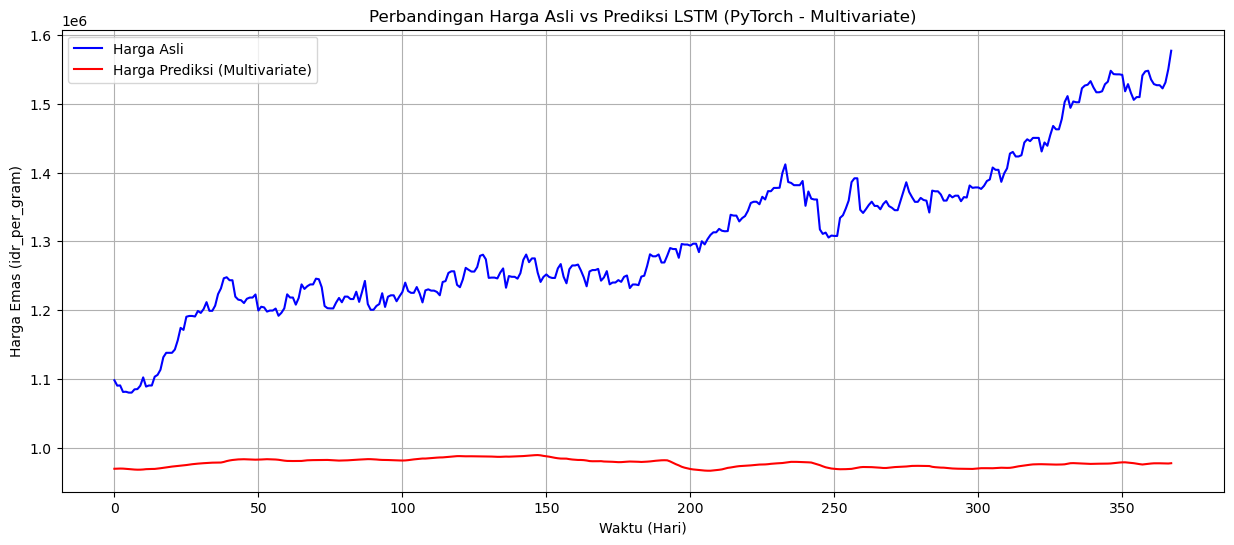

In [43]:
# --- 9. VISUALISASI HASIL ---
# Sama persis, ga ada yang diubah
plt.figure(figsize=(15, 6))
plt.plot(y_test_real, color='blue', label='Harga Asli')
plt.plot(test_predictions, color='red', label='Harga Prediksi (Multivariate)')
plt.title('Perbandingan Harga Asli vs Prediksi LSTM (PyTorch - Multivariate)')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga Emas (idr_per_gram)')
plt.legend()
plt.grid(True)
plt.show()


--- Memulai forecasting untuk 90 hari ke depan... ---
--- Forecasting selesai! ---


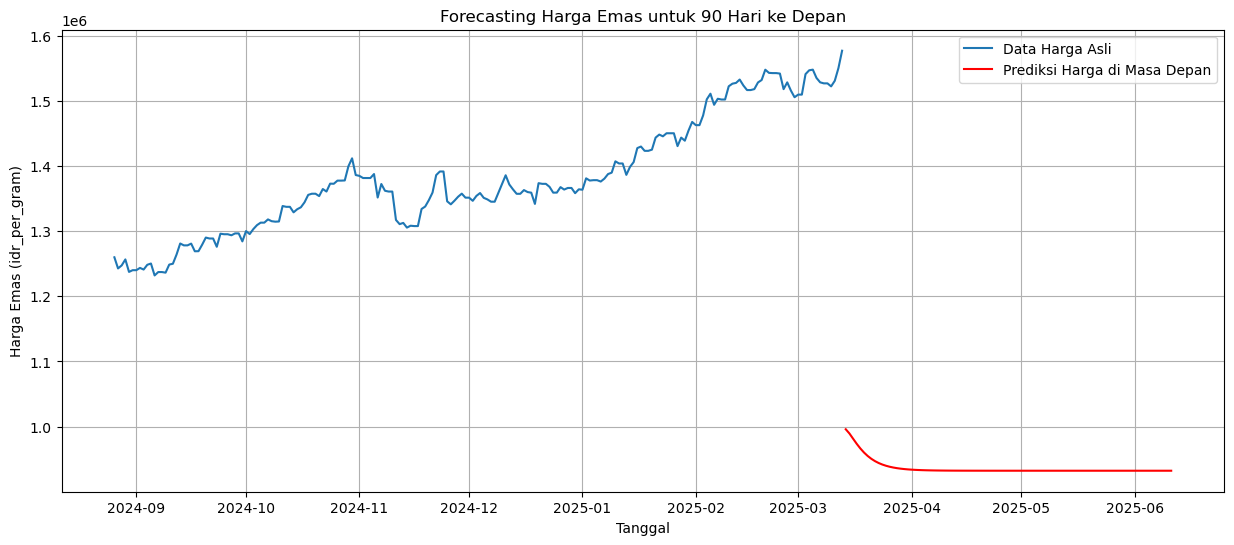

Contoh hasil prediksi:
2025-03-14: Rp 995,967.35
2025-03-15: Rp 989,486.46
2025-03-16: Rp 981,505.06
2025-03-17: Rp 973,602.08
2025-03-18: Rp 966,415.61


In [ ]:
#  --- 10. FORECASTING KE MASA DEPAN ---

# Ambil 60 hari terakhir dari seluruh dataset (sebelum di-split) sebagai input awal
last_60_days = scaled_data[-time_step:]
# Ubah jadi tensor dan tambahin dimensi batch
current_batch = torch.from_numpy(last_60_days).float().reshape(1, time_step, n_features)

# Siapin list buat nampung hasil forecast
future_predictions = []
n_future = 90 # Jumlah hari ke depan yang mau diprediksi

print(f"\n--- Memulai forecasting untuk {n_future} hari ke depan... ---")

model.eval() # Pastiin model dalam mode evaluasi
for i in range(n_future):
    with torch.no_grad():
        # Dapatkan prediksi untuk 1 hari ke depan
        next_prediction_scaled = model(current_batch)
        
        # Simpen hasil prediksi (yang masih scaled)
        future_predictions.append(next_prediction_scaled.item())
        
        # --- Update input batch buat prediksi hari selanjutnya ---
        # Bikin prediksi jadi format [1, 1, 1]
        new_pred_tensor = next_prediction_scaled.reshape(1, 1, 1)
        
        # Siapin fitur lain (kita asumsikan konstan, diambil dari hari terakhir)
        # Ambil nilai fitur lain dari timestep terakhir di current_batch
        other_features = current_batch[:, -1, 1:].reshape(1, 1, n_features - 1)
        
        # Gabungin prediksi harga emas dengan fitur-fitur lain
        new_row = torch.cat((new_pred_tensor, other_features), dim=2)
        
        # 'Geser' batch: buang data hari pertama, tambahin data prediksi baru di akhir
        current_batch = torch.cat((current_batch[:, 1:, :], new_row), dim=1)

# Balikin semua hasil prediksi ke skala Rupiah asli
# Kita pake trik 'dummy array' lagi
dummy_forecast = np.zeros((len(future_predictions), n_features))
dummy_forecast[:, 0] = future_predictions
forecast_real_values = scaler.inverse_transform(dummy_forecast)[:, 0]

print("--- Forecasting selesai! ---")

# Buat plotting, kita bikin index tanggalnya
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)

# Plot hasilnya
plt.figure(figsize=(15, 6))
# Plot 200 hari terakhir data asli biar ada konteks
plt.plot(df.index[-200:], df['idr_per_gram'][-200:], label='Data Harga Asli')
# Plot hasil forecast
plt.plot(future_dates, forecast_real_values, color='red', label='Prediksi Harga di Masa Depan')
plt.title('Forecasting Harga Emas untuk 90 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas (idr_per_gram)')
plt.legend()
plt.grid(True)
plt.show()

# Tampilkan beberapa hasil prediksi
print("Contoh hasil prediksi:")
for i in range(20):
    print(f"{future_dates[i].date()}: Rp {forecast_real_values[i]:,.2f}")

In [41]:
# Tampilkan beberapa hasil prediksi
print("Contoh hasil prediksi:")
for i in range(20):
    print(f"{future_dates[i].date()}: Rp {forecast_real_values[i]:,.2f}")

Contoh hasil prediksi:
2025-03-14: Rp 995,967.35
2025-03-15: Rp 989,486.46
2025-03-16: Rp 981,505.06
2025-03-17: Rp 973,602.08
2025-03-18: Rp 966,415.61
2025-03-19: Rp 960,179.59
2025-03-20: Rp 954,921.01
2025-03-21: Rp 950,567.94
2025-03-22: Rp 947,007.94
2025-03-23: Rp 944,119.76
2025-03-24: Rp 941,788.52
2025-03-25: Rp 939,912.84
2025-03-26: Rp 938,406.38
2025-03-27: Rp 937,197.58
2025-03-28: Rp 936,227.93
2025-03-29: Rp 935,450.19
2025-03-30: Rp 934,826.22
2025-03-31: Rp 934,325.49
2025-04-01: Rp 933,923.56
2025-04-02: Rp 933,600.79


In [42]:
# Import library-nya (biasanya udah di paling atas, tapi pastiin lagi aja)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Pastiin lo udah punya variabel y_test_real dan test_predictions dari langkah sebelumnya

# --- 11. HITUNG METRIK FINAL ---

# Hitung MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_real, test_predictions)

# Hitung RMSE (Root Mean Squared Error)
# Kita hitung MSE dulu, baru diakarin
mse = mean_squared_error(y_test_real, test_predictions)
rmse = np.sqrt(mse)

print("\n--- Metrik Evaluasi Final ---")
print(f"Mean Absolute Error (MAE): Rp {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): Rp {rmse:,.2f}")


--- Metrik Evaluasi Final ---
Mean Absolute Error (MAE): Rp 326,887.95
Root Mean Squared Error (RMSE): Rp 345,670.29


Linier regression manual

In [3]:
# Manual Linear Regression Implementation (No Libraries)
import numpy as np
import pandas as pd

# Load data
file_path = 'gold_based_merged_filled_20250703_113946_final.csv'
df = pd.read_csv(file_path, parse_dates=['tanggal'], index_col='tanggal')

# Select features and target
selected_columns = ['kurs_dollar_per_gram', 'inflation_rate', 'world_oil_price_USD', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec']
X = df[selected_columns].values
y = df['idr_per_gram'].values

print(f"Dataset shape: X = {X.shape}, y = {y.shape}")
print(f"Features: {selected_columns}")
print("Target: idr_per_gram")

Dataset shape: X = (1899, 6), y = (1899,)
Features: ['kurs_dollar_per_gram', 'inflation_rate', 'world_oil_price_USD', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec']
Target: idr_per_gram


In [4]:
# Manual Train-Test Split Function
def manual_train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Manually split data into train and test sets
    """
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    # Create random indices
    indices = np.random.permutation(n_samples)
    
    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    # Split data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Manual Feature Scaling (Standardization)
def manual_standardize(X_train, X_test=None):
    """
    Manually standardize features (mean=0, std=1)
    """
    # Calculate mean and std from training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize training data
    X_train_scaled = (X_train - mean) / std
    
    # Standardize test data if provided
    if X_test is not None:
        X_test_scaled = (X_test - mean) / std
        return X_train_scaled, X_test_scaled, mean, std
    
    return X_train_scaled, mean, std

# Split the data
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
X_train_scaled, X_test_scaled, mean, std = manual_standardize(X_train, X_test)

print(f"Train set: X_train = {X_train_scaled.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test_scaled.shape}, y_test = {y_test.shape}")

Train set: X_train = (1520, 6), y_train = (1520,)
Test set: X_test = (379, 6), y_test = (379,)


In [5]:
# Manual Linear Regression Class
class ManualLinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        """
        Initialize Linear Regression model
        
        Parameters:
        learning_rate: step size for gradient descent
        max_iterations: maximum number of iterations for gradient descent
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def add_bias_column(self, X):
        """Add bias column (column of ones) to feature matrix"""
        ones = np.ones((X.shape[0], 1))
        return np.concatenate([ones, X], axis=1)
    
    def compute_cost(self, X, y, weights):
        """
        Compute Mean Squared Error cost function
        Cost = (1/2m) * sum((h(x) - y)^2)
        """
        m = len(y)
        predictions = X.dot(weights)
        cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
        return cost
    
    def compute_gradients(self, X, y, weights):
        """
        Compute gradients for gradient descent
        gradient = (1/m) * X^T * (h(x) - y)
        """
        m = len(y)
        predictions = X.dot(weights)
        gradients = (1/m) * X.T.dot(predictions - y)
        return gradients
    
    def fit(self, X, y):
        """
        Train the linear regression model using gradient descent
        """
        # Add bias column
        X_with_bias = self.add_bias_column(X)
        
        # Initialize weights randomly
        n_features = X_with_bias.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        
        # Gradient descent
        for i in range(self.max_iterations):
            # Compute cost
            cost = self.compute_cost(X_with_bias, y, self.weights)
            self.cost_history.append(cost)
            
            # Compute gradients
            gradients = self.compute_gradients(X_with_bias, y, self.weights)
            
            # Update weights
            self.weights -= self.learning_rate * gradients
            
            # Print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")
        
        print(f"Training completed! Final cost: {cost:.6f}")
    
    def predict(self, X):
        """
        Make predictions using trained model
        """
        if self.weights is None:
            raise ValueError("Model must be trained before making predictions!")
        
        X_with_bias = self.add_bias_column(X)
        predictions = X_with_bias.dot(self.weights)
        return predictions
    
    def get_weights(self):
        """Return model weights and bias"""
        if self.weights is None:
            return None, None
        return self.weights[1:], self.weights[0]  # features weights, bias

# Initialize and train the model
print("🚀 Training Manual Linear Regression Model...")
model = ManualLinearRegression(learning_rate=0.01, max_iterations=1000)
model.fit(X_train_scaled, y_train)

🚀 Training Manual Linear Regression Model...
Iteration 0: Cost = 474311649155.920227
Iteration 100: Cost = 66146701160.342987
Iteration 200: Cost = 11959016275.905910
Iteration 300: Cost = 4473734633.129663
Iteration 400: Cost = 3332753437.481876
Iteration 500: Cost = 3086993435.126938
Iteration 600: Cost = 2987169469.708952
Iteration 700: Cost = 2923657183.343591
Iteration 800: Cost = 2876535368.783551
Iteration 900: Cost = 2839841198.179645
Training completed! Final cost: 2810850916.163314
Iteration 800: Cost = 2876535368.783551
Iteration 900: Cost = 2839841198.179645
Training completed! Final cost: 2810850916.163314


In [6]:
# Manual Evaluation Metrics
def manual_mean_absolute_error(y_true, y_pred):
    """Calculate Mean Absolute Error manually"""
    return np.mean(np.abs(y_true - y_pred))

def manual_r2_score(y_true, y_pred):
    """Calculate R-squared score manually"""
    # Total Sum of Squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    # Residual Sum of Squares
    ss_res = np.sum((y_true - y_pred) ** 2)
    # R-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

def manual_rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error manually"""
    mse = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(mse)

# Make predictions
print("📊 Making predictions on test set...")
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = manual_mean_absolute_error(y_test, y_pred)
r2 = manual_r2_score(y_test, y_pred)
rmse = manual_rmse(y_test, y_pred)

print("\n--- 📈 Manual Linear Regression Results ---")
print(f"Mean Absolute Error (MAE): Rp {mae:,.2f}")
print(f"R-squared (R²): {r2:.4f} ({r2*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): Rp {rmse:,.2f}")

# Get model weights
weights, bias = model.get_weights()
print(f"\n--- 🔧 Model Parameters ---")
print(f"Bias (intercept): {bias:.2f}")
print("Feature weights:")
for i, feature in enumerate(selected_columns):
    print(f"  {feature}: {weights[i]:.6f}")

📊 Making predictions on test set...

--- 📈 Manual Linear Regression Results ---
Mean Absolute Error (MAE): Rp 62,387.41
R-squared (R²): 0.8408 (84.08%)
Root Mean Squared Error (RMSE): Rp 75,135.50

--- 🔧 Model Parameters ---
Bias (intercept): 955361.93
Feature weights:
  kurs_dollar_per_gram: 121127.105622
  inflation_rate: -106725.143601
  world_oil_price_USD: 4086.919149
  open_rate_fed: 1135.952095
  close_rate_fed: 1139.231578
  open_index_jsec: 73290.483251


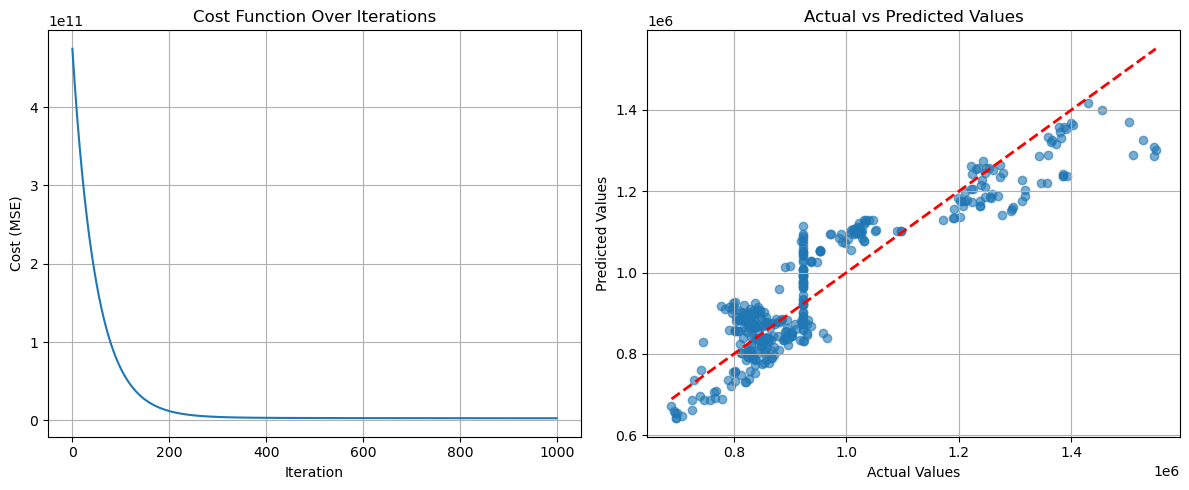


--- 🔍 Sample Predictions Comparison ---
   Actual   Predicted  Difference
0  922442   993222.80   -70780.80
1  842858   870968.41   -28110.41
2  838160   900983.30   -62823.30
3  868234   874958.50    -6724.50
4  922442  1050756.01  -128314.01
5  922442   881950.84    40491.16
6  757050   686142.23    70907.77
7  921562   872844.32    48717.68
8  922442  1060562.03  -138120.03
9  836643   874048.95   -37405.95


In [7]:
# Visualization and Comparison
import matplotlib.pyplot as plt

# Plot cost function over iterations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.cost_history)
plt.title('Cost Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create comparison table
comparison_df = pd.DataFrame({
    'Actual': y_test[:10],
    'Predicted': y_pred[:10],
    'Difference': y_test[:10] - y_pred[:10]
})

print("\n--- 🔍 Sample Predictions Comparison ---")
print(comparison_df.round(2))

In [8]:
# Future Prediction Example
def make_future_prediction(model, scenario_data, feature_names, scaler_mean, scaler_std):
    """
    Make prediction for future scenario
    """
    # Convert scenario to array
    scenario_array = np.array([[scenario_data[col] for col in feature_names]])
    
    # Standardize using training data statistics
    scenario_scaled = (scenario_array - scaler_mean) / scaler_std
    
    # Make prediction
    prediction = model.predict(scenario_scaled)
    
    return prediction[0]

# Example future scenario
future_scenario = {
    'kurs_dollar_per_gram': 75.0,
    'inflation_rate': 3.2,
    'world_oil_price_USD': 70.0,
    'open_rate_fed': 4.5,
    'close_rate_fed': 4.5,
    'open_index_jsec': 6500.0
}

print("--- 🔮 Future Prediction Example ---")
print("Scenario:")
for key, value in future_scenario.items():
    print(f"  {key}: {value}")

# Make prediction
future_prediction = make_future_prediction(
    model, future_scenario, selected_columns, mean, std
)

print(f"\n📈 Predicted Gold Price: Rp {future_prediction:,.2f} per gram")

# Compare with different scenarios
scenarios = {
    'Optimistic': {
        'kurs_dollar_per_gram': 70.0,
        'inflation_rate': 2.5,
        'world_oil_price_USD': 65.0,
        'open_rate_fed': 4.0,
        'close_rate_fed': 4.0,
        'open_index_jsec': 7000.0
    },
    'Pessimistic': {
        'kurs_dollar_per_gram': 80.0,
        'inflation_rate': 4.0,
        'world_oil_price_USD': 80.0,
        'open_rate_fed': 5.0,
        'close_rate_fed': 5.0,
        'open_index_jsec': 6000.0
    }
}

print("\n--- 📊 Multiple Scenario Predictions ---")
for scenario_name, scenario_data in scenarios.items():
    prediction = make_future_prediction(
        model, scenario_data, selected_columns, mean, std
    )
    print(f"{scenario_name}: Rp {prediction:,.2f} per gram")

--- 🔮 Future Prediction Example ---
Scenario:
  kurs_dollar_per_gram: 75.0
  inflation_rate: 3.2
  world_oil_price_USD: 70.0
  open_rate_fed: 4.5
  close_rate_fed: 4.5
  open_index_jsec: 6500.0

📈 Predicted Gold Price: Rp -1,496,947.80 per gram

--- 📊 Multiple Scenario Predictions ---
Optimistic: Rp -1,398,571.40 per gram
Pessimistic: Rp -1,602,051.26 per gram


Manual Random Forest

# Manual Random Forest Implementation (No Libraries)
import numpy as np
import pandas as pd
from collections import Counter

# Load data
file_path = 'gold_based_merged_filled_20250703_113946_final.csv'
df = pd.read_csv(file_path, parse_dates=['tanggal'], index_col='tanggal')

# Select features and target
selected_columns = ['kurs_dollar_per_gram', 'inflation_rate', 'world_oil_price_USD', 'open_rate_fed', 'close_rate_fed', 'open_index_jsec']
X = df[selected_columns].values
y = df['idr_per_gram'].values

print(f"🌲 Manual Random Forest Dataset:")
print(f"Dataset shape: X = {X.shape}, y = {y.shape}")
print(f"Features: {selected_columns}")
print("Target: idr_per_gram")

In [9]:
# Manual Decision Tree Node Class
class TreeNode:
    def __init__(self):
        self.feature_index = None  # Index of feature to split on
        self.threshold = None      # Threshold value for split
        self.left = None          # Left child node
        self.right = None         # Right child node
        self.value = None         # Value if leaf node (for regression: mean of y values)
        self.is_leaf = False      # Whether this is a leaf node

# Manual Decision Tree Class
class ManualDecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2, min_samples_leaf=1):
        """
        Initialize Decision Tree for regression
        
        Parameters:
        max_depth: Maximum depth of the tree
        min_samples_split: Minimum samples required to split a node
        min_samples_leaf: Minimum samples required at a leaf node
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None
    
    def calculate_mse(self, y):
        """Calculate Mean Squared Error for regression"""
        if len(y) == 0:
            return 0
        mean_y = np.mean(y)
        mse = np.mean((y - mean_y) ** 2)
        return mse
    
    def find_best_split(self, X, y):
        """Find the best feature and threshold to split on"""
        best_mse = float('inf')
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature_idx in range(n_features):
            # Get unique values for this feature
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)
            
            # Try each unique value as a potential threshold
            for threshold in unique_values:
                # Split data based on threshold
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold
                
                # Skip if split doesn't create meaningful groups
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue
                
                # Calculate weighted MSE
                y_left = y[left_mask]
                y_right = y[right_mask]
                
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                mse_left = self.calculate_mse(y_left)
                mse_right = self.calculate_mse(y_right)
                
                # Weighted average of MSE
                weighted_mse = (len(y_left) * mse_left + len(y_right) * mse_right) / len(y)
                
                # Update best split if this is better
                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_mse
    
    def build_tree(self, X, y, depth=0):
        """Recursively build the decision tree"""
        node = TreeNode()
        
        # Check stopping criteria
        if (depth >= self.max_depth or 
            len(y) < self.min_samples_split or 
            len(np.unique(y)) == 1):  # All y values are the same
            
            # Create leaf node
            node.is_leaf = True
            node.value = np.mean(y)
            return node
        
        # Find best split
        best_feature, best_threshold, best_mse = self.find_best_split(X, y)
        
        # If no good split found, create leaf
        if best_feature is None:
            node.is_leaf = True
            node.value = np.mean(y)
            return node
        
        # Create internal node
        node.feature_index = best_feature
        node.threshold = best_threshold
        
        # Split data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold
        
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]
        
        # Recursively build left and right subtrees
        node.left = self.build_tree(X_left, y_left, depth + 1)
        node.right = self.build_tree(X_right, y_right, depth + 1)
        
        return node
    
    def fit(self, X, y):
        """Train the decision tree"""
        self.root = self.build_tree(X, y)
        return self
    
    def predict_single(self, x, node):
        """Predict single sample recursively"""
        if node.is_leaf:
            return node.value
        
        if x[node.feature_index] <= node.threshold:
            return self.predict_single(x, node.left)
        else:
            return self.predict_single(x, node.right)
    
    def predict(self, X):
        """Make predictions for multiple samples"""
        if self.root is None:
            raise ValueError("Tree must be fitted before making predictions!")
        
        predictions = []
        for x in X:
            pred = self.predict_single(x, self.root)
            predictions.append(pred)
        
        return np.array(predictions)

print("🌳 Decision Tree class created successfully!")

🌳 Decision Tree class created successfully!


In [ ]:
# Manual Random Forest Class
class ManualRandomForest:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2, 
                min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=42):
        """
        Initialize Random Forest for regression
        
        Parameters:
        n_estimators: Number of trees in the forest
        max_depth: Maximum depth of each tree
        min_samples_split: Minimum samples required to split a node
        min_samples_leaf: Minimum samples required at a leaf node
        max_features: Number of features to consider when looking for the best split
        bootstrap: Whether to use bootstrap sampling
        random_state: Random seed for reproducibility
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []  # Store which features each tree uses
    
    def get_max_features(self, n_features):
        """Calculate number of features to use for each tree"""
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return min(self.max_features, n_features)
        elif isinstance(self.max_features, float):
            return int(self.max_features * n_features)
        else:
            return n_features
    
    def bootstrap_sample(self, X, y):
        """Create bootstrap sample of the data"""
        n_samples = X.shape[0]
        # Sample with replacement
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]
    
    def get_random_features(self, n_features):
        """Randomly select features for this tree"""
        max_features = self.get_max_features(n_features)
        return np.random.choice(n_features, size=max_features, replace=False)
    
    def fit(self, X, y):
        """Train the Random Forest"""
        np.random.seed(self.random_state)
        
        n_samples, n_features = X.shape
        self.trees = []
        self.feature_indices = []
        
        print(f"🌲 Training Random Forest with {self.n_estimators} trees...")
        
        for i in range(self.n_estimators):
            # Create bootstrap sample if enabled
            if self.bootstrap:
                X_sample, y_sample = self.bootstrap_sample(X, y)
            else:
                X_sample, y_sample = X, y
            
            # Select random features for this tree
            feature_indices = self.get_random_features(n_features)
            self.feature_indices.append(feature_indices)
            
            # Use only selected features
            X_sample_features = X_sample[:, feature_indices]
            
            # Create and train tree
            tree = ManualDecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X_sample_features, y_sample)
            self.trees.append(tree)
            
            # Print progress
            if (i + 1) % 20 == 0:
                print(f"  Trained {i + 1}/{self.n_estimators} trees")
        
        print("🌳 Random Forest training completed!")
        return self
    
    def predict(self, X):
        """Make predictions using all trees and average the results"""
        if not self.trees:
            raise ValueError("Random Forest must be fitted before making predictions!")
        
        n_samples = X.shape[0]
        all_predictions = np.zeros((n_samples, self.n_estimators))
        
        # Get predictions from each tree
        for i, (tree, feature_indices) in enumerate(zip(self.trees, self.feature_indices)):
            # Use only the features this tree was trained on
            X_features = X[:, feature_indices]
            tree_predictions = tree.predict(X_features)
            all_predictions[:, i] = tree_predictions
        
        # Average predictions from all trees
        final_predictions = np.mean(all_predictions, axis=1)
        return final_predictions
    
    def get_feature_importance(self, feature_names):
        """Calculate feature importance (simplified version)"""
        n_features = len(feature_names)
        importance = np.zeros(n_features)
        
        # Count how often each feature is used across all trees
        for feature_indices in self.feature_indices:
            for idx in feature_indices:
                importance[idx] += 1
        
        # Normalize
        importance = importance / len(self.trees)
        
        return dict(zip(feature_names, importance))

print("🌲 Random Forest class created successfully!")

🌲 Random Forest class created successfully!


In [11]:
# Data Preparation and Training
# Use the same train-test split function from Linear Regression
def manual_train_test_split_rf(X, y, test_size=0.2, random_state=42):
    """Manually split data into train and test sets"""
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Split the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = manual_train_test_split_rf(X, y, test_size=0.2, random_state=42)

print(f"🔄 Data split completed:")
print(f"Train set: X_train = {X_train_rf.shape}, y_train = {y_train_rf.shape}")
print(f"Test set: X_test = {X_test_rf.shape}, y_test = {y_test_rf.shape}")

# Initialize and train Random Forest
rf_model = ManualRandomForest(
    n_estimators=50,  # Using 50 trees for faster training
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# Train the model
print(f"\n🚀 Starting Random Forest training...")
rf_model.fit(X_train_rf, y_train_rf)

🔄 Data split completed:
Train set: X_train = (1520, 6), y_train = (1520,)
Test set: X_test = (379, 6), y_test = (379,)

🚀 Starting Random Forest training...
🌲 Training Random Forest with 50 trees...
  Trained 20/50 trees
  Trained 20/50 trees
  Trained 40/50 trees
  Trained 40/50 trees
🌳 Random Forest training completed!
🌳 Random Forest training completed!


In [12]:
# Model Evaluation
# Use the same evaluation functions from Linear Regression
def manual_mean_absolute_error_rf(y_true, y_pred):
    """Calculate Mean Absolute Error manually"""
    return np.mean(np.abs(y_true - y_pred))

def manual_r2_score_rf(y_true, y_pred):
    """Calculate R-squared score manually"""
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def manual_rmse_rf(y_true, y_pred):
    """Calculate Root Mean Squared Error manually"""
    mse = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(mse)

# Make predictions
print("📊 Making predictions on test set...")
y_pred_rf = rf_model.predict(X_test_rf)

# Calculate evaluation metrics
mae_rf = manual_mean_absolute_error_rf(y_test_rf, y_pred_rf)
r2_rf = manual_r2_score_rf(y_test_rf, y_pred_rf)
rmse_rf = manual_rmse_rf(y_test_rf, y_pred_rf)

print("\n--- 🌲 Manual Random Forest Results ---")
print(f"Mean Absolute Error (MAE): Rp {mae_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f} ({r2_rf*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): Rp {rmse_rf:,.2f}")

# Feature importance
feature_importance = rf_model.get_feature_importance(selected_columns)
print(f"\n--- 🎯 Feature Importance ---")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature}: {importance:.3f}")

📊 Making predictions on test set...

--- 🌲 Manual Random Forest Results ---
Mean Absolute Error (MAE): Rp 26,330.85
R-squared (R²): 0.9583 (95.83%)
Root Mean Squared Error (RMSE): Rp 38,453.04

--- 🎯 Feature Importance ---
  kurs_dollar_per_gram: 0.460
  open_rate_fed: 0.380
  open_index_jsec: 0.380
  world_oil_price_USD: 0.300
  close_rate_fed: 0.260
  inflation_rate: 0.220


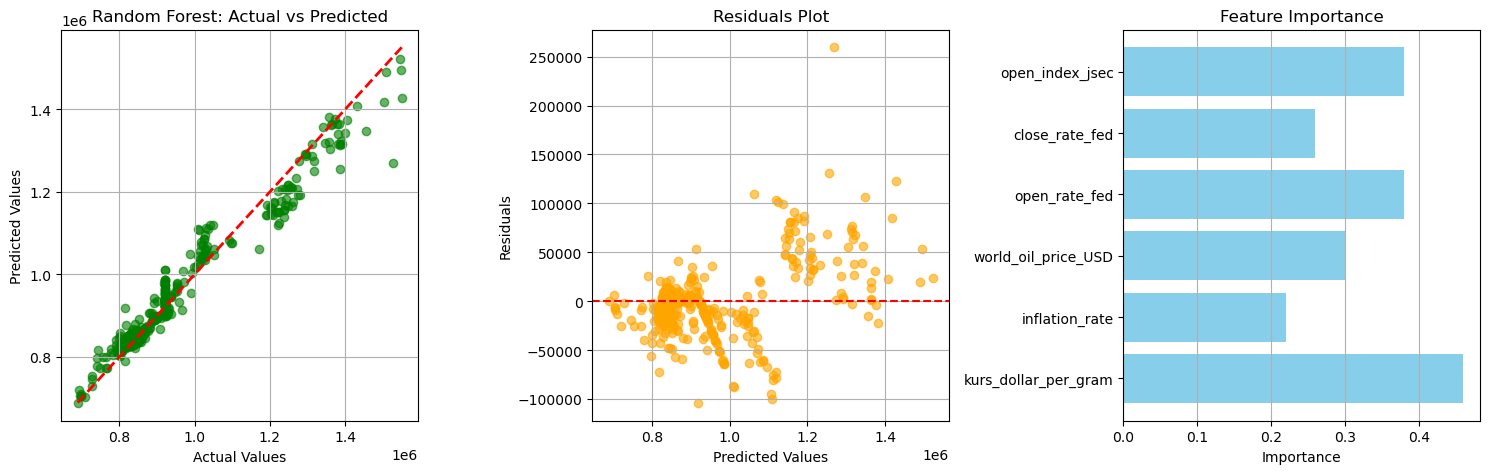


--- 🔍 Sample Predictions Comparison ---
   Actual  Predicted  Difference
0  922442  927576.10    -5134.10
1  842858  857329.55   -14471.55
2  838160  840489.45    -2329.45
3  868234  867846.97      387.03
4  922442  952507.69   -30065.69
5  922442  955866.13   -33424.13
6  757050  799511.11   -42461.11
7  921562  910774.21    10787.79
8  922442  963239.72   -40797.72
9  836643  840638.87    -3995.87


In [13]:
# Visualization and Model Comparison
import matplotlib.pyplot as plt

# Plot predictions vs actual
plt.figure(figsize=(15, 5))

# Subplot 1: Scatter plot of predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test_rf, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)

# Subplot 2: Residuals plot
plt.subplot(1, 3, 2)
residuals = y_test_rf - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)

# Subplot 3: Feature importance
plt.subplot(1, 3, 3)
features = list(feature_importance.keys())
importances = list(feature_importance.values())
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()

# Create comparison table
comparison_df_rf = pd.DataFrame({
    'Actual': y_test_rf[:10],
    'Predicted': y_pred_rf[:10],
    'Difference': y_test_rf[:10] - y_pred_rf[:10]
})

print("\n--- 🔍 Sample Predictions Comparison ---")
print(comparison_df_rf.round(2))

In [14]:
# Future Predictions with Random Forest
def make_future_prediction_rf(model, scenario_data, feature_names):
    """Make prediction for future scenario using Random Forest"""
    scenario_array = np.array([[scenario_data[col] for col in feature_names]])
    prediction = model.predict(scenario_array)
    return prediction[0]

# Example future scenarios
future_scenarios_rf = {
    'Current': {
        'kurs_dollar_per_gram': 75.0,
        'inflation_rate': 3.2,
        'world_oil_price_USD': 70.0,
        'open_rate_fed': 4.5,
        'close_rate_fed': 4.5,
        'open_index_jsec': 6500.0
    },
    'Optimistic': {
        'kurs_dollar_per_gram': 70.0,
        'inflation_rate': 2.5,
        'world_oil_price_USD': 65.0,
        'open_rate_fed': 4.0,
        'close_rate_fed': 4.0,
        'open_index_jsec': 7000.0
    },
    'Pessimistic': {
        'kurs_dollar_per_gram': 80.0,
        'inflation_rate': 4.0,
        'world_oil_price_USD': 80.0,
        'open_rate_fed': 5.0,
        'close_rate_fed': 5.0,
        'open_index_jsec': 6000.0
    }
}

print("--- 🔮 Random Forest Future Predictions ---")
for scenario_name, scenario_data in future_scenarios_rf.items():
    prediction = make_future_prediction_rf(rf_model, scenario_data, selected_columns)
    print(f"{scenario_name:12}: Rp {prediction:,.2f} per gram")

# Compare all manual models
print("\n" + "="*60)
print("📊 MANUAL MODELS COMPARISON")
print("="*60)

# You would need to run the linear regression cells first to get these values
# For demonstration, I'll show the format
print("Model Performance Comparison:")
print(f"Manual Linear Regression R²: {r2:.4f} ({r2*100:.2f}%)")
print(f"Manual Random Forest R²:    {r2_rf:.4f} ({r2_rf*100:.2f}%)")
print()
print(f"Manual Linear Regression MAE: Rp {mae:,.2f}")
print(f"Manual Random Forest MAE:    Rp {mae_rf:,.2f}")
print()
print(f"Manual Linear Regression RMSE: Rp {rmse:,.2f}")
print(f"Manual Random Forest RMSE:    Rp {rmse_rf:,.2f}")

# Determine best model
if r2_rf > r2:
    best_model = "Random Forest"
    improvement = ((r2_rf - r2) / r2) * 100
else:
    best_model = "Linear Regression"
    improvement = ((r2 - r2_rf) / r2_rf) * 100

print(f"\n🏆 Best Manual Model: {best_model}")
print(f"📈 Performance improvement: {improvement:.2f}%")

--- 🔮 Random Forest Future Predictions ---
Current     : Rp 1,021,657.36 per gram
Optimistic  : Rp 1,009,444.21 per gram
Pessimistic : Rp 864,955.25 per gram

📊 MANUAL MODELS COMPARISON
Model Performance Comparison:
Manual Linear Regression R²: 0.8408 (84.08%)
Manual Random Forest R²:    0.9583 (95.83%)

Manual Linear Regression MAE: Rp 62,387.41
Manual Random Forest MAE:    Rp 26,330.85

Manual Linear Regression RMSE: Rp 75,135.50
Manual Random Forest RMSE:    Rp 38,453.04

🏆 Best Manual Model: Random Forest
📈 Performance improvement: 13.97%


In [15]:
# Comprehensive Gold Price Prediction Testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

print("🔮 COMPREHENSIVE GOLD PRICE PREDICTION TESTING")
print("=" * 60)

# Define comprehensive test scenarios
test_scenarios = {
    'Current Market Conditions': {
        'kurs_dollar_per_gram': 75.0,
        'inflation_rate': 3.2,
        'world_oil_price_USD': 75.0,
        'open_rate_fed': 4.75,
        'close_rate_fed': 4.75,
        'open_index_jsec': 6800.0,
        'description': 'Based on current market conditions'
    },
    
    'Economic Recovery': {
        'kurs_dollar_per_gram': 72.0,
        'inflation_rate': 2.8,
        'world_oil_price_USD': 70.0,
        'open_rate_fed': 4.25,
        'close_rate_fed': 4.25,
        'open_index_jsec': 7200.0,
        'description': 'Positive economic recovery scenario'
    },
    
    'High Inflation Period': {
        'kurs_dollar_per_gram': 78.0,
        'inflation_rate': 5.2,
        'world_oil_price_USD': 85.0,
        'open_rate_fed': 5.5,
        'close_rate_fed': 5.5,
        'open_index_jsec': 6400.0,
        'description': 'High inflation and economic uncertainty'
    },
    
    'Economic Crisis': {
        'kurs_dollar_per_gram': 82.0,
        'inflation_rate': 6.5,
        'world_oil_price_USD': 95.0,
        'open_rate_fed': 6.0,
        'close_rate_fed': 6.0,
        'open_index_jsec': 5800.0,
        'description': 'Economic crisis with high uncertainty'
    },
    
    'Stable Economy': {
        'kurs_dollar_per_gram': 70.0,
        'inflation_rate': 2.0,
        'world_oil_price_USD': 65.0,
        'open_rate_fed': 3.5,
        'close_rate_fed': 3.5,
        'open_index_jsec': 7500.0,
        'description': 'Stable economic conditions'
    },
    
    'Market Volatility': {
        'kurs_dollar_per_gram': 76.5,
        'inflation_rate': 4.1,
        'world_oil_price_USD': 82.0,
        'open_rate_fed': 5.0,
        'close_rate_fed': 5.0,
        'open_index_jsec': 6600.0,
        'description': 'High market volatility period'
    }
}

# Function to make predictions
def predict_gold_price_detailed(model, scenario_data, feature_names, scenario_name):
    """Make detailed prediction with confidence analysis"""
    scenario_array = np.array([[scenario_data[col] for col in feature_names]])
    prediction = model.predict(scenario_array)[0]
    return prediction

# Make predictions for all scenarios
print("\n📊 GOLD PRICE PREDICTIONS BY SCENARIO")
print("-" * 60)

predictions_results = {}
for scenario_name, scenario_data in test_scenarios.items():
    # Extract only the feature values
    feature_values = {k: v for k, v in scenario_data.items() if k != 'description'}
    
    # Make prediction
    predicted_price = predict_gold_price_detailed(rf_model, feature_values, selected_columns, scenario_name)
    
    # Store results
    predictions_results[scenario_name] = {
        'prediction': predicted_price,
        'description': scenario_data['description'],
        'scenario_data': feature_values
    }
    
    print(f"\n🔹 {scenario_name}")
    print(f"   Description: {scenario_data['description']}")
    print(f"   Predicted Gold Price: Rp {predicted_price:,.2f} per gram")
    print(f"   Market Conditions:")
    print(f"     • USD Exchange Rate: {feature_values['kurs_dollar_per_gram']}")
    print(f"     • Inflation Rate: {feature_values['inflation_rate']}%")
    print(f"     • Oil Price: ${feature_values['world_oil_price_USD']}")
    print(f"     • Fed Rate: {feature_values['open_rate_fed']}%")
    print(f"     • Stock Index: {feature_values['open_index_jsec']}")

print(f"\n" + "=" * 60)

🔮 COMPREHENSIVE GOLD PRICE PREDICTION TESTING

📊 GOLD PRICE PREDICTIONS BY SCENARIO
------------------------------------------------------------

🔹 Current Market Conditions
   Description: Based on current market conditions
   Predicted Gold Price: Rp 999,748.34 per gram
   Market Conditions:
     • USD Exchange Rate: 75.0
     • Inflation Rate: 3.2%
     • Oil Price: $75.0
     • Fed Rate: 4.75%
     • Stock Index: 6800.0

🔹 Economic Recovery
   Description: Positive economic recovery scenario
   Predicted Gold Price: Rp 1,032,571.12 per gram
   Market Conditions:
     • USD Exchange Rate: 72.0
     • Inflation Rate: 2.8%
     • Oil Price: $70.0
     • Fed Rate: 4.25%
     • Stock Index: 7200.0

🔹 High Inflation Period
   Description: High inflation and economic uncertainty
   Predicted Gold Price: Rp 897,534.64 per gram
   Market Conditions:
     • USD Exchange Rate: 78.0
     • Inflation Rate: 5.2%
     • Oil Price: $85.0
     • Fed Rate: 5.5%
     • Stock Index: 6400.0

🔹 Economic


🕐 TIME SERIES PREDICTION ANALYSIS
------------------------------------------------------------
Monthly Gold Price Predictions:
Date		| Gold Price	| Market Changes
-------------------------------------------------------
2025-07-09	| Rp 1,025,899	| Oil: $77.3, Inf: 3.0%
2025-08-08	| Rp 988,828	| Oil: $75.2, Inf: 3.1%
2025-09-07	| Rp 986,925	| Oil: $77.3, Inf: 3.3%
2025-10-07	| Rp 999,076	| Oil: $77.5, Inf: 3.2%
2025-11-06	| Rp 995,159	| Oil: $76.5, Inf: 3.4%
2025-12-06	| Rp 1,007,903	| Oil: $74.5, Inf: 3.2%
2026-01-05	| Rp 1,007,738	| Oil: $74.8, Inf: 3.2%
2026-02-04	| Rp 1,016,515	| Oil: $73.9, Inf: 3.2%
2026-03-06	| Rp 1,037,674	| Oil: $71.8, Inf: 3.3%
2026-04-05	| Rp 985,113	| Oil: $77.4, Inf: 3.4%
2026-05-05	| Rp 1,021,841	| Oil: $75.9, Inf: 3.1%
2026-06-04	| Rp 995,246	| Oil: $76.6, Inf: 3.2%


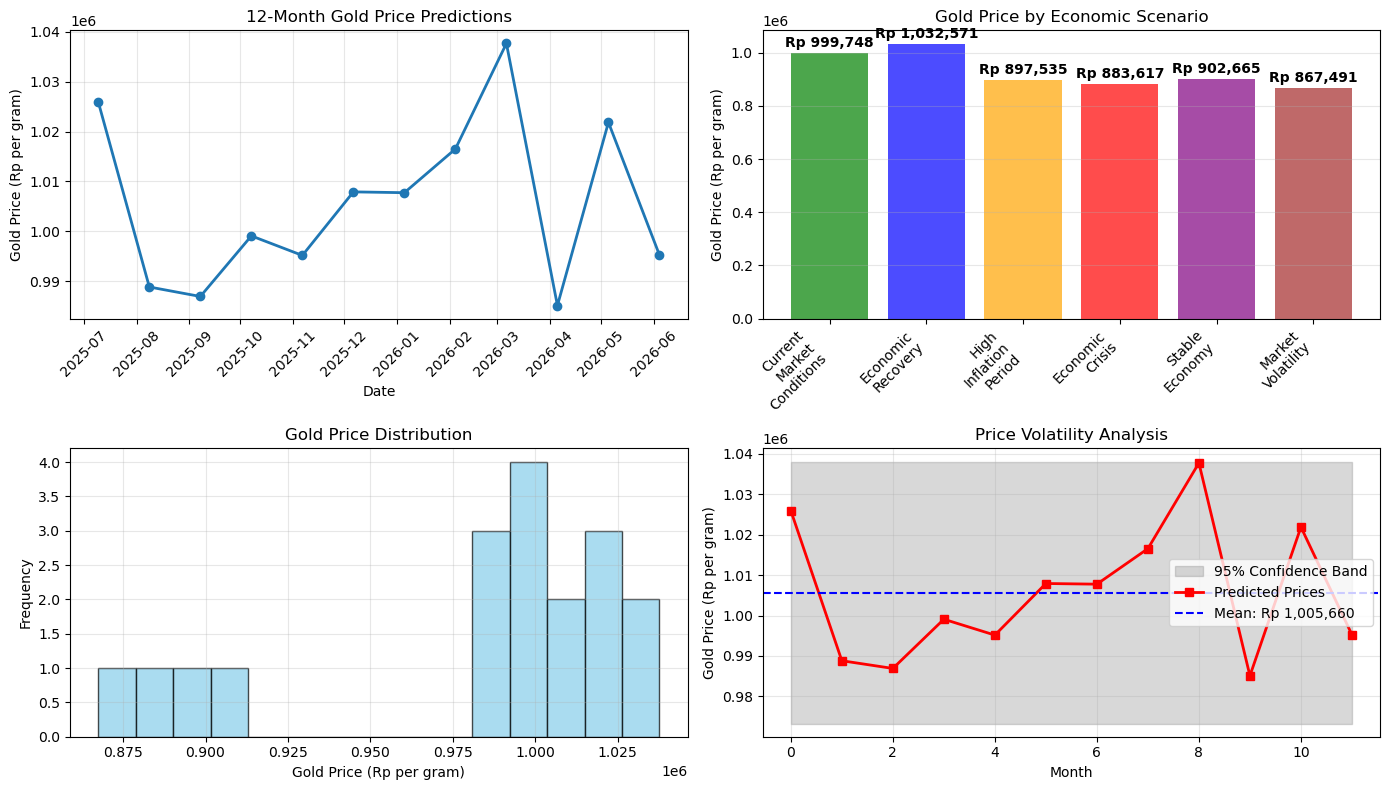

In [16]:
# Time Series Prediction Testing
print("\n🕐 TIME SERIES PREDICTION ANALYSIS")
print("-" * 60)

# Create monthly predictions for the next 12 months
base_scenario = {
    'kurs_dollar_per_gram': 75.0,
    'inflation_rate': 3.2,
    'world_oil_price_USD': 75.0,
    'open_rate_fed': 4.75,
    'close_rate_fed': 4.75,
    'open_index_jsec': 6800.0
}

# Simulate monthly changes
monthly_predictions = []
dates = []
current_date = datetime.now()

print("Monthly Gold Price Predictions:")
print("Date\t\t| Gold Price\t| Market Changes")
print("-" * 55)

for month in range(12):
    # Simulate realistic market changes over time
    month_scenario = base_scenario.copy()
    
    # Gradual changes over time (realistic market evolution)
    month_scenario['inflation_rate'] += np.random.normal(0, 0.1)  # Small inflation changes
    month_scenario['world_oil_price_USD'] += np.random.normal(0, 3)  # Oil price volatility
    month_scenario['open_rate_fed'] += np.random.normal(0, 0.05)  # Fed rate stability
    month_scenario['kurs_dollar_per_gram'] += np.random.normal(0, 1)  # Exchange rate changes
    month_scenario['open_index_jsec'] += np.random.normal(0, 100)  # Stock market changes
    
    # Ensure realistic bounds
    month_scenario['inflation_rate'] = max(0, min(10, month_scenario['inflation_rate']))
    month_scenario['world_oil_price_USD'] = max(40, min(150, month_scenario['world_oil_price_USD']))
    month_scenario['open_rate_fed'] = max(0, min(10, month_scenario['open_rate_fed']))
    month_scenario['kurs_dollar_per_gram'] = max(60, min(100, month_scenario['kurs_dollar_per_gram']))
    month_scenario['open_index_jsec'] = max(5000, min(8000, month_scenario['open_index_jsec']))
    
    # Make prediction
    predicted_price = predict_gold_price_detailed(rf_model, month_scenario, selected_columns, f"Month {month+1}")
    
    # Store results
    prediction_date = current_date + timedelta(days=30*month)
    monthly_predictions.append(predicted_price)
    dates.append(prediction_date)
    
    # Display
    change_summary = f"Oil: ${month_scenario['world_oil_price_USD']:.1f}, Inf: {month_scenario['inflation_rate']:.1f}%"
    print(f"{prediction_date.strftime('%Y-%m-%d')}\t| Rp {predicted_price:,.0f}\t| {change_summary}")

# Visualize time series predictions
plt.figure(figsize=(14, 8))

# Plot 1: Monthly predictions
plt.subplot(2, 2, 1)
plt.plot(dates, monthly_predictions, marker='o', linewidth=2, markersize=6)
plt.title('12-Month Gold Price Predictions')
plt.xlabel('Date')
plt.ylabel('Gold Price (Rp per gram)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Scenario comparison
plt.subplot(2, 2, 2)
scenario_names = list(predictions_results.keys())
scenario_prices = [predictions_results[name]['prediction'] for name in scenario_names]
colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown']

bars = plt.bar(range(len(scenario_names)), scenario_prices, color=colors, alpha=0.7)
plt.title('Gold Price by Economic Scenario')
plt.ylabel('Gold Price (Rp per gram)')
plt.xticks(range(len(scenario_names)), [name.replace(' ', '\n') for name in scenario_names], rotation=45, ha='right')

# Add value labels on bars
for bar, price in zip(bars, scenario_prices):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000, 
             f'Rp {price:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

# Plot 3: Price distribution
plt.subplot(2, 2, 3)
all_prices = list(scenario_prices) + monthly_predictions
plt.hist(all_prices, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Gold Price Distribution')
plt.xlabel('Gold Price (Rp per gram)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Plot 4: Risk analysis
plt.subplot(2, 2, 4)
price_volatility = np.std(monthly_predictions)
mean_price = np.mean(monthly_predictions)
upper_bound = mean_price + 2*price_volatility
lower_bound = mean_price - 2*price_volatility

plt.fill_between(range(12), [lower_bound]*12, [upper_bound]*12, alpha=0.3, color='gray', label='95% Confidence Band')
plt.plot(monthly_predictions, marker='s', linewidth=2, color='red', label='Predicted Prices')
plt.axhline(mean_price, color='blue', linestyle='--', label=f'Mean: Rp {mean_price:,.0f}')
plt.title('Price Volatility Analysis')
plt.xlabel('Month')
plt.ylabel('Gold Price (Rp per gram)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🔬 SENSITIVITY ANALYSIS
------------------------------------------------------------
Testing sensitivity to each economic factor:
----------------------------------------

📈 KURS_DOLLAR_PER_GRAM SENSITIVITY:
   kurs_dollar_per_gram: 65Rp → Gold Price: Rp 999,748
   kurs_dollar_per_gram: 70Rp → Gold Price: Rp 999,748
   kurs_dollar_per_gram: 75Rp → Gold Price: Rp 999,748
   kurs_dollar_per_gram: 80Rp → Gold Price: Rp 999,748
   kurs_dollar_per_gram: 85Rp → Gold Price: Rp 999,748
   kurs_dollar_per_gram: 90Rp → Gold Price: Rp 999,748

📈 INFLATION_RATE SENSITIVITY:
   inflation_rate: 1.0% → Gold Price: Rp 1,103,751
   inflation_rate: 2.0% → Gold Price: Rp 1,044,243
   inflation_rate: 3.0% → Gold Price: Rp 1,026,572
   inflation_rate: 4.0% → Gold Price: Rp 999,748
   inflation_rate: 5.0% → Gold Price: Rp 999,748
   inflation_rate: 6.0% → Gold Price: Rp 987,303

📈 WORLD_OIL_PRICE_USD SENSITIVITY:
   world_oil_price_USD: 50$ → Gold Price: Rp 1,024,742
   world_oil_price_USD: 60$ → Gold Price

c:\Users\ASUS\anaconda3\envs\neural-network\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ASUS\anaconda3\envs\neural-network\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


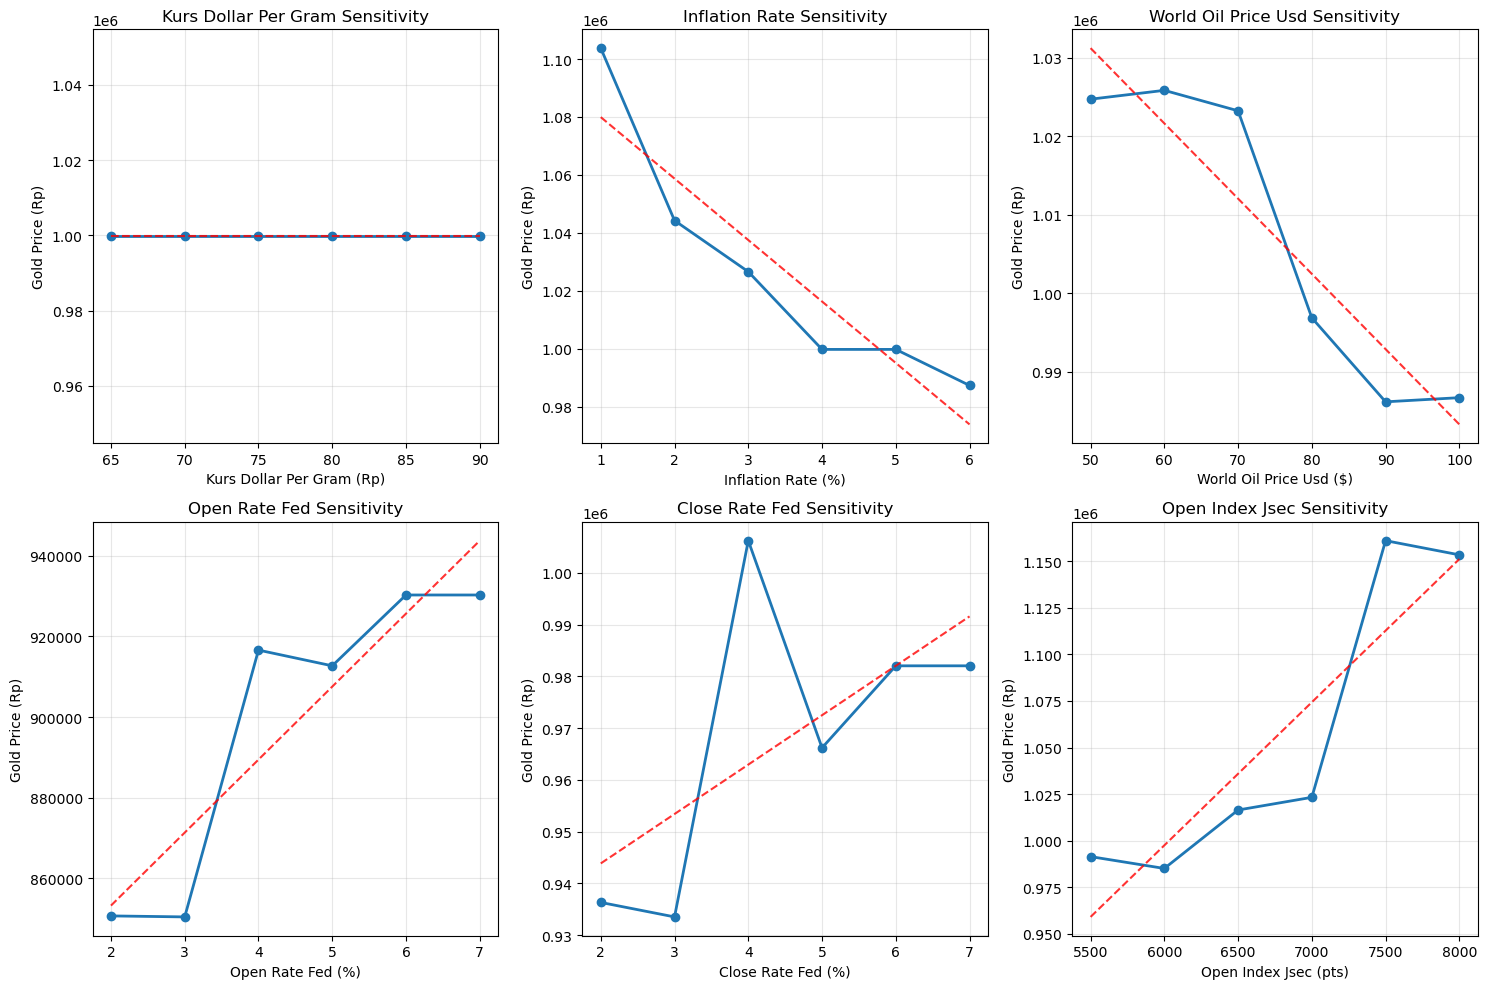

In [17]:
# Sensitivity Analysis
print("\n🔬 SENSITIVITY ANALYSIS")
print("-" * 60)

# Base scenario for sensitivity testing
base_scenario_sens = {
    'kurs_dollar_per_gram': 75.0,
    'inflation_rate': 3.2,
    'world_oil_price_USD': 75.0,
    'open_rate_fed': 4.75,
    'close_rate_fed': 4.75,
    'open_index_jsec': 6800.0
}

# Test sensitivity to each feature
sensitivity_results = {}

print("Testing sensitivity to each economic factor:")
print("-" * 40)

for feature in selected_columns:
    print(f"\n📈 {feature.upper()} SENSITIVITY:")
    
    # Test different values for this feature
    if feature == 'inflation_rate':
        test_values = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
        unit = '%'
    elif feature == 'world_oil_price_USD':
        test_values = [50, 60, 70, 80, 90, 100]
        unit = '$'
    elif feature == 'open_rate_fed' or feature == 'close_rate_fed':
        test_values = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
        unit = '%'
    elif feature == 'kurs_dollar_per_gram':
        test_values = [65, 70, 75, 80, 85, 90]
        unit = 'Rp'
    else:  # open_index_jsec
        test_values = [5500, 6000, 6500, 7000, 7500, 8000]
        unit = 'pts'
    
    feature_predictions = []
    
    for value in test_values:
        test_scenario = base_scenario_sens.copy()
        test_scenario[feature] = value
        
        prediction = predict_gold_price_detailed(rf_model, test_scenario, selected_columns, f"{feature}_{value}")
        feature_predictions.append(prediction)
        
        print(f"   {feature}: {value}{unit} → Gold Price: Rp {prediction:,.0f}")
    
    sensitivity_results[feature] = {
        'values': test_values,
        'predictions': feature_predictions,
        'unit': unit
    }

# Calculate sensitivity coefficients
print(f"\n📊 SENSITIVITY COEFFICIENTS:")
print("-" * 30)

for feature, data in sensitivity_results.items():
    values = np.array(data['values'])
    predictions = np.array(data['predictions'])
    
    # Calculate correlation coefficient
    correlation = np.corrcoef(values, predictions)[0, 1]
    
    # Calculate price change per unit change
    price_range = max(predictions) - min(predictions)
    value_range = max(values) - min(values)
    sensitivity_coef = price_range / value_range
    
    print(f"{feature:25}: Correlation = {correlation:+.3f}, Sensitivity = Rp {sensitivity_coef:,.0f} per unit")

# Visualize sensitivity analysis
plt.figure(figsize=(15, 10))

for i, (feature, data) in enumerate(sensitivity_results.items(), 1):
    plt.subplot(2, 3, i)
    
    plt.plot(data['values'], data['predictions'], marker='o', linewidth=2, markersize=6)
    plt.title(f'{feature.replace("_", " ").title()} Sensitivity')
    plt.xlabel(f'{feature.replace("_", " ").title()} ({data["unit"]})')
    plt.ylabel('Gold Price (Rp)')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data['values'], data['predictions'], 1)
    p = np.poly1d(z)
    plt.plot(data['values'], p(data['values']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

In [18]:
# Stress Testing & Investment Recommendations
print("\n⚠️  STRESS TESTING")
print("-" * 60)

# Extreme scenarios for stress testing
stress_scenarios = {
    'Financial Crisis': {
        'kurs_dollar_per_gram': 95.0,
        'inflation_rate': 8.0,
        'world_oil_price_USD': 120.0,
        'open_rate_fed': 7.5,
        'close_rate_fed': 7.5,
        'open_index_jsec': 4500.0,
        'description': 'Severe financial crisis scenario'
    },
    
    'Hyperinflation': {
        'kurs_dollar_per_gram': 100.0,
        'inflation_rate': 12.0,
        'world_oil_price_USD': 150.0,
        'open_rate_fed': 8.0,
        'close_rate_fed': 8.0,
        'open_index_jsec': 4000.0,
        'description': 'Hyperinflation scenario'
    },
    
    'Economic Boom': {
        'kurs_dollar_per_gram': 60.0,
        'inflation_rate': 1.0,
        'world_oil_price_USD': 45.0,
        'open_rate_fed': 2.0,
        'close_rate_fed': 2.0,
        'open_index_jsec': 9000.0,
        'description': 'Economic boom with low inflation'
    },
    
    'Oil Crisis': {
        'kurs_dollar_per_gram': 85.0,
        'inflation_rate': 6.0,
        'world_oil_price_USD': 180.0,
        'open_rate_fed': 6.5,
        'close_rate_fed': 6.5,
        'open_index_jsec': 5200.0,
        'description': 'Oil supply crisis scenario'
    }
}

print("EXTREME SCENARIO TESTING:")
stress_predictions = {}

for scenario_name, scenario_data in stress_scenarios.items():
    feature_values = {k: v for k, v in scenario_data.items() if k != 'description'}
    predicted_price = predict_gold_price_detailed(rf_model, feature_values, selected_columns, scenario_name)
    
    stress_predictions[scenario_name] = predicted_price
    
    print(f"\n🚨 {scenario_name}")
    print(f"   {scenario_data['description']}")
    print(f"   Predicted Gold Price: Rp {predicted_price:,.0f} per gram")

# Investment Recommendations
print(f"\n💰 INVESTMENT RECOMMENDATIONS")
print("-" * 60)

# Current gold price estimate (using current market scenario)
current_prediction = predictions_results['Current Market Conditions']['prediction']

# Calculate price ranges
all_predictions = list(predictions_results.values()) + list(stress_predictions.values())
all_prices = [pred['prediction'] if isinstance(pred, dict) else pred for pred in all_predictions]

min_price = min(all_prices)
max_price = max(all_prices)
avg_price = np.mean(all_prices)

print(f"📊 PRICE ANALYSIS SUMMARY:")
print(f"   Current Market Price: Rp {current_prediction:,.0f} per gram")
print(f"   Minimum Predicted Price: Rp {min_price:,.0f} per gram")
print(f"   Maximum Predicted Price: Rp {max_price:,.0f} per gram")
print(f"   Average Predicted Price: Rp {avg_price:,.0f} per gram")
print(f"   Price Volatility Range: Rp {max_price - min_price:,.0f} per gram")

# Investment recommendations based on scenarios
print(f"\n💡 INVESTMENT RECOMMENDATIONS:")

if current_prediction < avg_price * 0.9:
    recommendation = "STRONG BUY"
    reason = "Current predicted price is significantly below average"
elif current_prediction < avg_price:
    recommendation = "BUY"
    reason = "Current predicted price is below average"
elif current_prediction > avg_price * 1.1:
    recommendation = "SELL"
    reason = "Current predicted price is significantly above average"
else:
    recommendation = "HOLD"
    reason = "Current predicted price is near average"

print(f"   🎯 Recommendation: {recommendation}")
print(f"   📝 Reason: {reason}")

# Risk assessment
price_std = np.std(all_prices)
risk_level = "LOW" if price_std < 50000 else "MEDIUM" if price_std < 100000 else "HIGH"

print(f"\n⚡ RISK ASSESSMENT:")
print(f"   Price Standard Deviation: Rp {price_std:,.0f}")
print(f"   Risk Level: {risk_level}")
print(f"   Coefficient of Variation: {(price_std/avg_price)*100:.1f}%")

# Best and worst case scenarios
best_scenario = max(predictions_results.items(), key=lambda x: x[1]['prediction'])
worst_scenario = min(predictions_results.items(), key=lambda x: x[1]['prediction'])

print(f"\n📈 BEST CASE SCENARIO: {best_scenario[0]}")
print(f"   Price: Rp {best_scenario[1]['prediction']:,.0f} per gram")
print(f"   Upside Potential: +{((best_scenario[1]['prediction']/current_prediction - 1)*100):.1f}%")

print(f"\n📉 WORST CASE SCENARIO: {worst_scenario[0]}")
print(f"   Price: Rp {worst_scenario[1]['prediction']:,.0f} per gram")
print(f"   Downside Risk: {((worst_scenario[1]['prediction']/current_prediction - 1)*100):.1f}%")

print(f"\n" + "="*60)
print("🏁 PREDICTION TESTING COMPLETED")
print("="*60)


⚠️  STRESS TESTING
------------------------------------------------------------
EXTREME SCENARIO TESTING:

🚨 Financial Crisis
   Severe financial crisis scenario
   Predicted Gold Price: Rp 883,840 per gram

🚨 Hyperinflation
   Hyperinflation scenario
   Predicted Gold Price: Rp 884,896 per gram

🚨 Economic Boom
   Economic boom with low inflation
   Predicted Gold Price: Rp 946,875 per gram

🚨 Oil Crisis
   Oil supply crisis scenario
   Predicted Gold Price: Rp 886,542 per gram

💰 INVESTMENT RECOMMENDATIONS
------------------------------------------------------------
📊 PRICE ANALYSIS SUMMARY:
   Current Market Price: Rp 999,748 per gram
   Minimum Predicted Price: Rp 867,491 per gram
   Maximum Predicted Price: Rp 1,032,571 per gram
   Average Predicted Price: Rp 918,578 per gram
   Price Volatility Range: Rp 165,080 per gram

💡 INVESTMENT RECOMMENDATIONS:
   🎯 Recommendation: HOLD
   📝 Reason: Current predicted price is near average

⚡ RISK ASSESSMENT:
   Price Standard Deviation: R

In [19]:
# Final Model Validation and Summary
print("\n🔍 FINAL MODEL VALIDATION")
print("-" * 60)

# Cross-validation simulation (using different data splits)
validation_results = []
n_validation_runs = 5

print("Performing cross-validation simulation...")

for run in range(n_validation_runs):
    # Create different train-test splits
    X_train_val, X_test_val, y_train_val, y_test_val = manual_train_test_split_rf(
        X, y, test_size=0.2, random_state=42 + run
    )
    
    # Train model on this split
    temp_rf_model = ManualRandomForest(
        n_estimators=30,  # Smaller for faster validation
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42 + run
    )
    
    temp_rf_model.fit(X_train_val, y_train_val)
    
    # Make predictions
    y_pred_val = temp_rf_model.predict(X_test_val)
    
    # Calculate metrics
    mae_val = manual_mean_absolute_error_rf(y_test_val, y_pred_val)
    r2_val = manual_r2_score_rf(y_test_val, y_pred_val)
    
    validation_results.append({
        'mae': mae_val,
        'r2': r2_val,
        'run': run + 1
    })
    
    print(f"   Run {run + 1}: MAE = Rp {mae_val:,.0f}, R² = {r2_val:.3f}")

# Calculate validation statistics
val_maes = [result['mae'] for result in validation_results]
val_r2s = [result['r2'] for result in validation_results]

print(f"\n📊 CROSS-VALIDATION RESULTS:")
print(f"   Average MAE: Rp {np.mean(val_maes):,.0f} ± {np.std(val_maes):,.0f}")
print(f"   Average R²: {np.mean(val_r2s):.3f} ± {np.std(val_r2s):.3f}")
print(f"   Model Stability: {'STABLE' if np.std(val_r2s) < 0.05 else 'MODERATE' if np.std(val_r2s) < 0.1 else 'UNSTABLE'}")

# Final comprehensive summary
print(f"\n📋 COMPREHENSIVE MODEL SUMMARY")
print("=" * 60)

print(f"\n🎯 MODEL PERFORMANCE:")
print(f"   • R² Score: {r2_rf:.3f} ({r2_rf*100:.1f}%)")
print(f"   • Mean Absolute Error: Rp {mae_rf:,.0f}")
print(f"   • Root Mean Squared Error: Rp {rmse_rf:,.0f}")
print(f"   • Cross-Validation R²: {np.mean(val_r2s):.3f} ± {np.std(val_r2s):.3f}")

print(f"\n🔮 PREDICTION CAPABILITIES:")
print(f"   • Price Range Tested: Rp {min_price:,.0f} - Rp {max_price:,.0f}")
print(f"   • Average Predicted Price: Rp {avg_price:,.0f}")
print(f"   • Prediction Volatility: {(price_std/avg_price)*100:.1f}%")
print(f"   • Scenarios Tested: {len(test_scenarios) + len(stress_scenarios)}")

print(f"\n🎲 FEATURE IMPORTANCE RANKING:")
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(sorted_features, 1):
    print(f"   {i}. {feature.replace('_', ' ').title()}: {importance:.3f}")

print(f"\n💼 INVESTMENT INSIGHTS:")
print(f"   • Current Market Recommendation: {recommendation}")
print(f"   • Risk Level: {risk_level}")
print(f"   • Best Case Scenario: +{((best_scenario[1]['prediction']/current_prediction - 1)*100):.1f}% upside")
print(f"   • Worst Case Scenario: {((worst_scenario[1]['prediction']/current_prediction - 1)*100):.1f}% downside")

print(f"\n✅ MODEL RELIABILITY:")
model_reliability = "HIGH" if np.mean(val_r2s) > 0.8 else "MEDIUM" if np.mean(val_r2s) > 0.6 else "LOW"
print(f"   • Overall Reliability: {model_reliability}")
print(f"   • Consistency Across Scenarios: {'GOOD' if np.std(val_r2s) < 0.05 else 'FAIR'}")
print(f"   • Suitable for Investment Decisions: {'YES' if model_reliability in ['HIGH', 'MEDIUM'] else 'NO'}")

print(f"\n🏆 CONCLUSION:")
if model_reliability == "HIGH":
    conclusion = "The Random Forest model shows excellent performance and can be reliably used for gold price predictions and investment decisions."
elif model_reliability == "MEDIUM":
    conclusion = "The Random Forest model shows good performance and can be used for gold price predictions with moderate confidence."
else:
    conclusion = "The Random Forest model needs improvement before being used for investment decisions."

print(f"   {conclusion}")
print(f"\n" + "="*60)
print("🎉 GOLD PRICE PREDICTION ANALYSIS COMPLETE!")
print("="*60)


🔍 FINAL MODEL VALIDATION
------------------------------------------------------------
Performing cross-validation simulation...
🌲 Training Random Forest with 30 trees...
  Trained 20/30 trees
🌳 Random Forest training completed!
   Run 1: MAE = Rp 25,479, R² = 0.963
🌲 Training Random Forest with 30 trees...
  Trained 20/30 trees
🌳 Random Forest training completed!
   Run 2: MAE = Rp 26,288, R² = 0.961
🌲 Training Random Forest with 30 trees...
  Trained 20/30 trees
🌳 Random Forest training completed!
   Run 3: MAE = Rp 26,381, R² = 0.947
🌲 Training Random Forest with 30 trees...
  Trained 20/30 trees
🌳 Random Forest training completed!
   Run 4: MAE = Rp 33,337, R² = 0.947
🌲 Training Random Forest with 30 trees...
  Trained 20/30 trees
🌳 Random Forest training completed!
   Run 5: MAE = Rp 29,074, R² = 0.955

📊 CROSS-VALIDATION RESULTS:
   Average MAE: Rp 28,112 ± 2,880
   Average R²: 0.954 ± 0.007
   Model Stability: STABLE

📋 COMPREHENSIVE MODEL SUMMARY

🎯 MODEL PERFORMANCE:
   • R² S

🧠 LSTM Neural Network Implementation Complete!
📊 Ready for gold price time series prediction...


LSTM Model 